In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as t_func
import os

In [ ]:
def train_model(model, inputs, outputs):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
    max_epochs = 20000
    losses = []

    for epoch in range(max_epochs):
        model.train()
        predictions = model(inputs)
        loss = criterion(predictions, outputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 1000 == 0:
            print(f'Epoch {epoch}/{max_epochs}, Loss: {loss.item()}')
        if losses[-1] < 0.001:
          print("Convergence achieved, stopping it")
          break

    return losses

In [ ]:
def function_1(x):
  return (np.sin(5 * (np.pi) * x)) / (5 * np.pi * x)

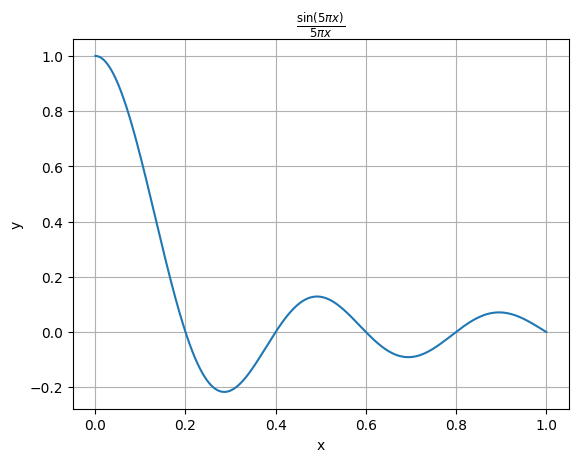

In [ ]:
# Generate Data for fun 1
x = np.linspace(1e-4, 1, 2000).reshape(-1, 1)
y = function_1(x)
func1_x, func1_y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(func1_x, func1_y)
plt.title(r'$\frac{\sin(5 \pi x)}{5 \pi x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [ ]:
class ModelOne(nn.Module):
    def __init__(self):
        super(ModelOne, self).__init__()
        self.layer_1 = nn.Linear(1, 5)
        self.layer_2 = nn.Linear(5, 10)
        self.layer_3 = nn.Linear(10, 10)
        self.layer_4 = nn.Linear(10, 10)
        self.layer_5 = nn.Linear(10, 10)
        self.layer_6 = nn.Linear(10, 10)
        self.layer_7 = nn.Linear(10, 5)
        self.layer_8 = nn.Linear(5, 1)

    def forward(self, input_data):
        x1 = t_func.relu(self.layer_1(input_data))
        x2 = t_func.relu(self.layer_2(x1))
        x3 = t_func.relu(self.layer_3(x2))
        x4 = t_func.relu(self.layer_4(x3))
        x5 = t_func.relu(self.layer_5(x4))
        x6 = t_func.relu(self.layer_6(x5))
        x7 = t_func.relu(self.layer_7(x6))
        x8 = self.layer_8(x7)
        return x8


In [ ]:
class ModelTwo(nn.Module):
    def __init__(self):
        super(ModelTwo, self).__init__()
        self.layer1 = nn.Linear(1, 10)
        self.layer2 = nn.Linear(10, 18)
        self.layer3 = nn.Linear(18, 15)
        self.layer4 = nn.Linear(15, 4)
        self.layer5 = nn.Linear(4, 1)

    def forward(self, input_data):
        x1 = t_func.relu(self.layer1(input_data))
        x2 = t_func.relu(self.layer2(x1))
        x3 = t_func.relu(self.layer3(x2))
        x4 = t_func.relu(self.layer4(x3))
        x5 = self.layer5(x4)
        return x5


In [ ]:
class ModelThree(nn.Module):
    def __init__(self):
        super(ModelThree, self).__init__()
        self.layer1 = nn.Linear(1, 190)
        self.layer2 = nn.Linear(190, 1)
    def forward(self, input_data):
        x1 = t_func.relu(self.layer1(input_data))
        x2 = self.layer2(x1)
        return x2

In [ ]:
model_one = ModelOne()
model_one_losses = train_model(model_one, func1_x, func1_y)
model_two = ModelTwo()
model_two_losses = train_model(model_two, func1_x, func1_y)
model_three = ModelThree()
model_three_losses = train_model(model_three, func1_x, func1_y)


Epoch 0/20000, Loss: 0.09883122146129608
Epoch 1000/20000, Loss: 0.08562322705984116
Epoch 2000/20000, Loss: 0.04525661841034889
Epoch 3000/20000, Loss: 0.027635645121335983
Epoch 4000/20000, Loss: 0.01824524998664856
Epoch 5000/20000, Loss: 0.011619075201451778
Epoch 6000/20000, Loss: 0.007319211959838867
Epoch 7000/20000, Loss: 0.004280624445527792
Epoch 8000/20000, Loss: 0.0017579549457877874
Convergence achieved, stopping it
Epoch 0/20000, Loss: 0.08763604611158371
Epoch 1000/20000, Loss: 0.04377514496445656
Epoch 2000/20000, Loss: 0.005651925690472126
Epoch 3000/20000, Loss: 0.004429076332598925
Epoch 4000/20000, Loss: 0.0031295744702219963
Epoch 5000/20000, Loss: 0.0012808804167434573
Convergence achieved, stopping it
Epoch 0/20000, Loss: 0.1305760145187378
Epoch 1000/20000, Loss: 0.03561235964298248
Epoch 2000/20000, Loss: 0.016647502779960632
Epoch 3000/20000, Loss: 0.00806800089776516
Epoch 4000/20000, Loss: 0.005103590898215771
Epoch 5000/20000, Loss: 0.003684339113533497
Epo

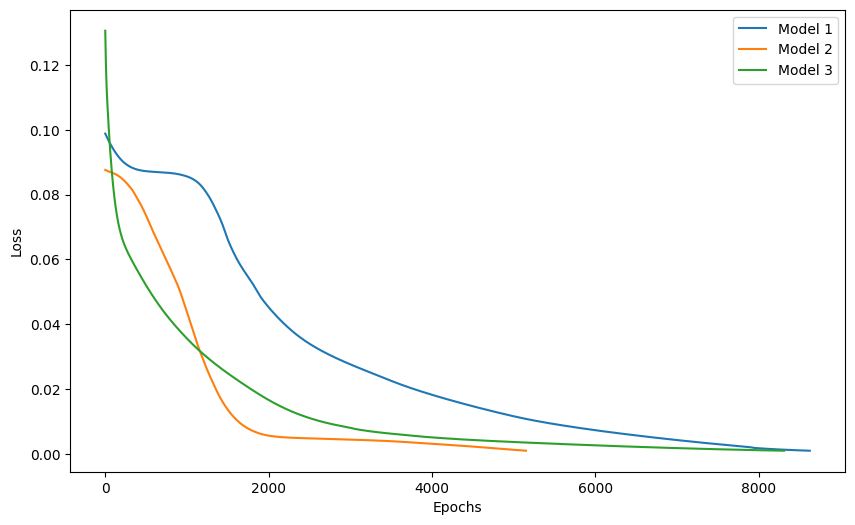

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(model_one_losses, label='Model 1')
plt.plot(model_two_losses, label='Model 2')
plt.plot(model_three_losses, label='Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

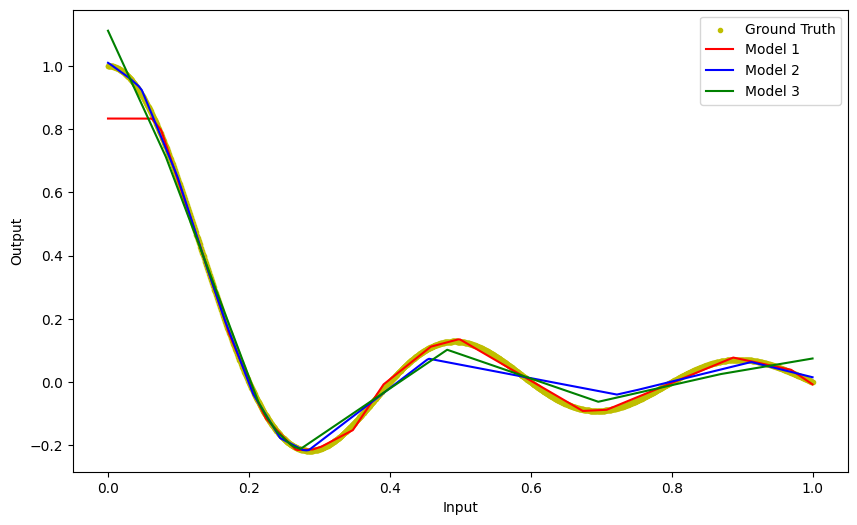

In [ ]:
with torch.no_grad():
    model_one.eval()
    model_two.eval()
    model_three.eval()

    predictions_model1 = model_one(func1_x)
    predictions_model2 = model_two(func1_x)
    predictions_model3 = model_three(func1_x)

plt.figure(figsize=(10, 6))
plt.scatter(func1_x, func1_y, label='Ground Truth', marker='.', color="y")
plt.plot(func1_x, predictions_model1.numpy(), label='Model 1', color="r")
plt.plot(func1_x, predictions_model2.numpy(), label='Model 2', color="b")
plt.plot(func1_x, predictions_model3.numpy(), label='Model 3', color="g")
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [ ]:
def function_2(x):
  return np.sign(np.sin(5*np.pi*x))

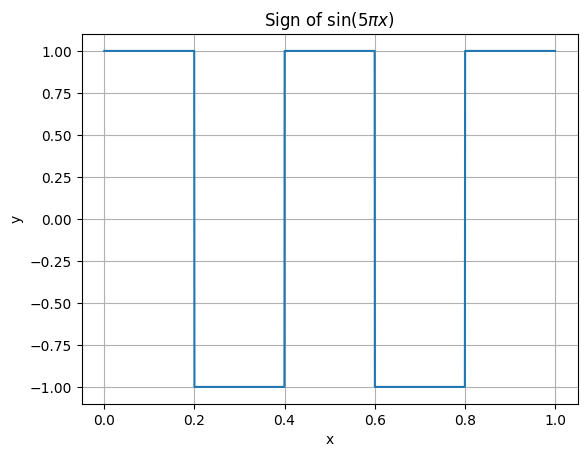

In [ ]:
# Generate Data for fun 2
x = np.linspace(1e-4, 1, 2000).reshape(-1, 1)
y = function_2(x)
func2_x, func2_y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(func2_x, func2_y)
plt.title('Sign of $\\sin(5\\pi x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [ ]:
model_one = ModelOne()
model_one_losses = train_model(model_one, func2_x, func2_y)
model_two = ModelTwo()
model_two_losses = train_model(model_two, func2_x, func2_y)
model_three = ModelThree()
model_three_losses = train_model(model_three, func2_x, func2_y)

Epoch 0/20000, Loss: 1.1505202054977417
Epoch 1000/20000, Loss: 0.9582307934761047
Epoch 2000/20000, Loss: 0.851778507232666
Epoch 3000/20000, Loss: 0.3794002830982208
Epoch 4000/20000, Loss: 0.09887240827083588
Epoch 5000/20000, Loss: 0.060684386640787125
Epoch 6000/20000, Loss: 0.041851915419101715
Epoch 7000/20000, Loss: 0.029376374557614326
Epoch 8000/20000, Loss: 0.020023752003908157
Epoch 9000/20000, Loss: 0.014140545390546322
Epoch 10000/20000, Loss: 0.010846232995390892
Epoch 11000/20000, Loss: 0.008569600991904736
Epoch 12000/20000, Loss: 0.006970483809709549
Epoch 13000/20000, Loss: 0.005887201521545649
Epoch 14000/20000, Loss: 0.00514649273827672
Epoch 15000/20000, Loss: 0.004309387411922216
Epoch 16000/20000, Loss: 0.00400950713083148
Epoch 17000/20000, Loss: 0.003459856379777193
Epoch 18000/20000, Loss: 0.0031244081910699606
Epoch 19000/20000, Loss: 0.0029128508176654577
Epoch 0/20000, Loss: 1.0145535469055176
Epoch 1000/20000, Loss: 0.9548531770706177
Epoch 2000/20000, Lo

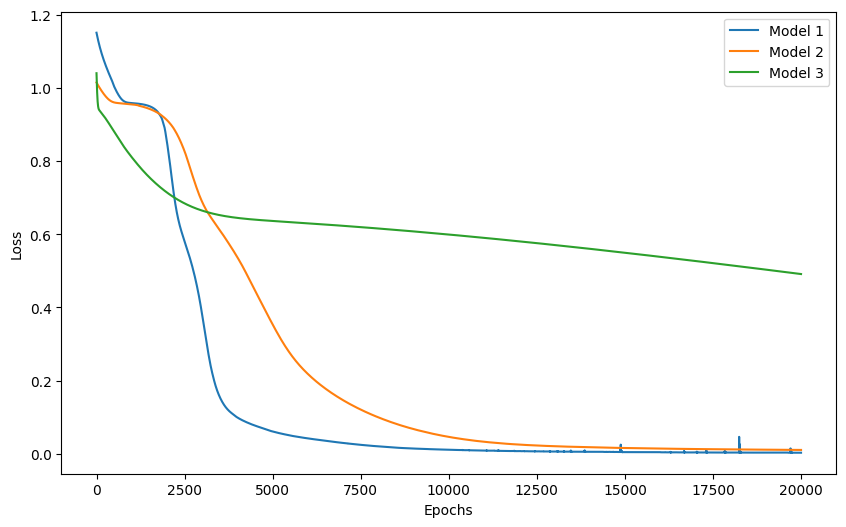

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(model_one_losses, label='Model 1')
plt.plot(model_two_losses, label='Model 2')
plt.plot(model_three_losses, label='Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

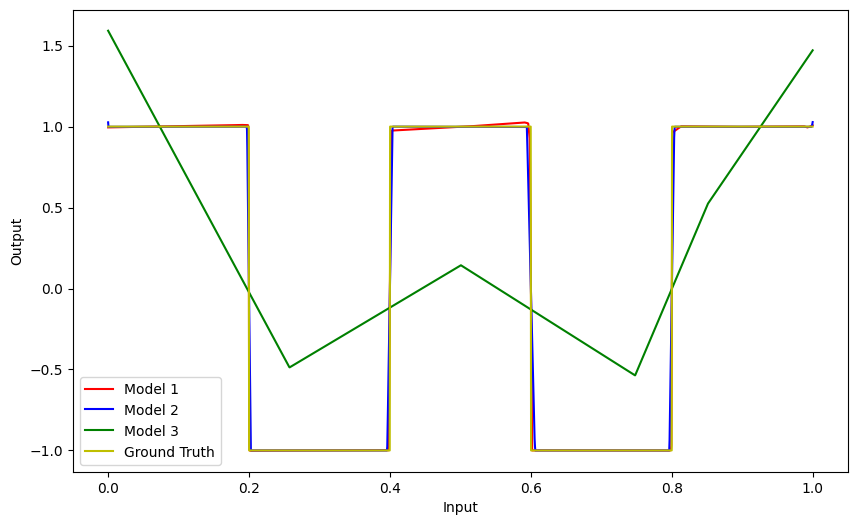

In [ ]:
with torch.no_grad():
    model_one.eval()
    model_two.eval()
    model_three.eval()

    predictions_model1 = model_one(func2_x)
    predictions_model2 = model_two(func2_x)
    predictions_model3 = model_three(func2_x)

plt.figure(figsize=(10, 6))
plt.plot(func2_x, predictions_model1.numpy(), label='Model 1', color="r")
plt.plot(func2_x, predictions_model2.numpy(), label='Model 2', color="b")
plt.plot(func2_x, predictions_model3.numpy(), label='Model 3', color="g")
plt.plot(func2_x, func2_y, label='Ground Truth', color="y")
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()